In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataset = pd.read_csv('fraudData.csv')

In [3]:
dataset.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [4]:
dataset.shape

(594643, 10)

In [5]:
dataset.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [7]:
dataset['gender'] = dataset['gender'].str.replace('E','O')
dataset['gender'] = dataset['gender'].str.replace('U','O')

In [8]:
dataset['gender'].value_counts()

'F'    324565
'M'    268385
'O'      1693
Name: gender, dtype: int64

In [9]:
dataset['age'].value_counts()

'2'    187310
'3'    147131
'4'    109025
'5'     62642
'1'     58131
'6'     26774
'0'      2452
'U'      1178
Name: age, dtype: int64

# Feature selection

In [10]:
var1 = dataset['age']
var2 = dataset['gender']

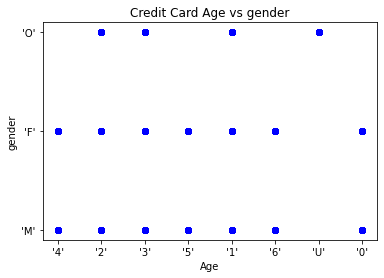

In [11]:
plt.scatter(var1, var2, color = "blue")
plt.title("Credit Card Age vs gender")
plt.xlabel("Age")
plt.ylabel("gender")
plt.show()

In [12]:
categorical_data = dataset.select_dtypes(include = ['object']).copy()

In [13]:
categorical_data.head()

,customer,age,gender,zipcodeOri,merchant,zipMerchant,category
0,'C1093826151','4','M','28007','M348934600','28007','es_transportation'
1,'C352968107','2','M','28007','M348934600','28007','es_transportation'
2,'C2054744914','4','F','28007','M1823072687','28007','es_transportation'
3,'C1760612790','3','M','28007','M348934600','28007','es_transportation'
4,'C757503768','5','M','28007','M348934600','28007','es_transportation'


In [14]:
categorical_data['category'].value_counts()

'es_transportation'        505119
'es_food'                   26254
'es_health'                 16133
'es_wellnessandbeauty'      15086
'es_fashion'                 6454
'es_barsandrestaurants'      6373
'es_hyper'                   6098
'es_sportsandtoys'           4002
'es_tech'                    2370
'es_home'                    1986
'es_hotelservices'           1744
'es_otherservices'            912
'es_contents'                 885
'es_travel'                   728
'es_leisure'                  499
Name: category, dtype: int64

# Describe categorical data

'F'    324565
'M'    268385
'O'      1693
Name: gender, dtype: int64


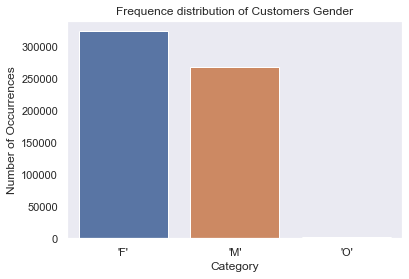

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

category_count = categorical_data['gender'].value_counts()
print(category_count)
sns.set(style = "dark")
sns.barplot(x = category_count.index,y = category_count.values)
plt.title('Frequence distribution of Customers Gender')
plt.ylabel('Number of Occurrences',fontsize = 12)
plt.xlabel('Category', fontsize = 12)
plt.show()

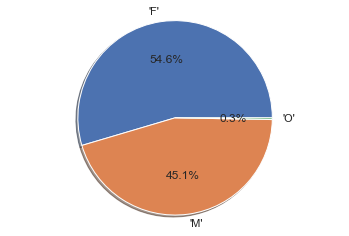

In [16]:
labels = categorical_data['gender'].astype('category').cat.categories.tolist()
counts = categorical_data['gender'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

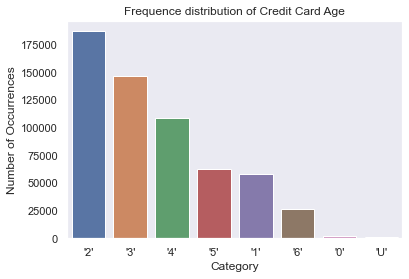

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

age_count = categorical_data['age'].value_counts()
sns.set(style = "dark")
sns.barplot(x = age_count.index, y = age_count.values)
plt.title('Frequence distribution of Credit Card Age')
plt.ylabel('Number of Occurrences',fontsize = 12)
plt.xlabel('Category', fontsize = 12)
plt.show()

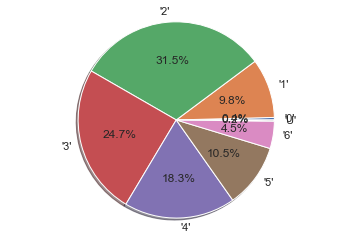

In [18]:
labels = categorical_data['age'].astype('category').cat.categories.tolist()
counts = categorical_data['age'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [19]:
dataset

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


In [88]:
dataset['category'].value_counts()

12    505119
3      26254
4      16133
14     15086
2       6454
0       6373
7       6098
10      4002
11      2370
5       1986
6       1744
9        912
1        885
13       728
8        499
Name: category, dtype: int64

In [20]:
dataset['fraud'].value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

# Ordinal Encoding of Categorical Data

In [21]:
dataset['gender'].unique()

array(["'M'", "'F'", "'O'"], dtype=object)

In [22]:
gender_order = ["'M'", "'F'", "'O'"]

In [23]:
from sklearn.preprocessing import OrdinalEncoder

In [24]:
enco = OrdinalEncoder(categories = [gender_order])

In [25]:
enco.fit(dataset[['gender']])

OrdinalEncoder(categories=[["'M'", "'F'", "'O'"]])

In [26]:
convert_gender = pd.DataFrame(enco.transform(dataset[['gender']]))

In [27]:
dataset['gender'] = convert_gender

In [28]:
dataset

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4',0.0,'28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2',0.0,'28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4',1.0,'28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3',0.0,'28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5',0.0,'28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3',1.0,'28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4',1.0,'28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2',1.0,'28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5',0.0,'28007','M1823072687','28007','es_transportation',14.46,0


In [29]:
dataset['age'].unique()

array(["'4'", "'2'", "'3'", "'5'", "'1'", "'6'", "'U'", "'0'"],
      dtype=object)

In [30]:
age_order = ["'0'", "'1'", "'2'","'3'", "'4'", "'5'", "'6'", "'U'"]

In [31]:
enco = OrdinalEncoder(categories = [age_order])

In [32]:
enco.fit(dataset[['age']])

OrdinalEncoder(categories=[["'0'", "'1'", "'2'", "'3'", "'4'", "'5'", "'6'",
                            "'U'"]])

In [33]:
convert_age = pd.DataFrame(enco.transform(dataset[['age']]))

In [34]:
dataset['age'] = convert_age

In [35]:
dataset.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151',4.0,0.0,'28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107',2.0,0.0,'28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914',4.0,1.0,'28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790',3.0,0.0,'28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768',5.0,0.0,'28007','M348934600','28007','es_transportation',35.72,0


In [36]:
dataset['gender'].value_counts()

1.0    324565
0.0    268385
2.0      1693
Name: gender, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()

In [39]:
dataset['customer'] = le.fit_transform(dataset['customer'])
dataset['zipcodeOri'] = le.fit_transform(dataset['zipcodeOri'])
dataset['merchant'] = le.fit_transform(dataset['merchant'])
dataset['zipMerchant'] = le.fit_transform(dataset['zipMerchant'])
dataset['category'] = le.fit_transform(dataset['category'])

In [40]:
dataset.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,210,4.0,0.0,0,30,0,12,4.55,0
1,0,2753,2.0,0.0,0,30,0,12,39.68,0
2,0,2285,4.0,1.0,0,18,0,12,26.89,0
3,0,1650,3.0,0.0,0,30,0,12,17.25,0
4,0,3585,5.0,0.0,0,30,0,12,35.72,0


In [41]:
dataset.isnull().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [42]:
dataset['fraud'].value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

# Class of Dataset

In [43]:
legit = dataset[dataset.fraud == 0]
fraud = dataset[dataset.fraud == 1]

In [44]:
print(legit.shape)
print(fraud.shape)

(587443, 10)
(7200, 10)


In [45]:
legit

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,210,4.0,0.0,0,30,0,12,4.55,0
1,0,2753,2.0,0.0,0,30,0,12,39.68,0
2,0,2285,4.0,1.0,0,18,0,12,26.89,0
3,0,1650,3.0,0.0,0,30,0,12,17.25,0
4,0,3585,5.0,0.0,0,30,0,12,35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,1639,3.0,1.0,0,18,0,12,20.53,0
594639,179,3369,4.0,1.0,0,18,0,12,50.73,0
594640,179,529,2.0,1.0,0,31,0,2,22.44,0
594641,179,1083,5.0,0.0,0,18,0,12,14.46,0


In [46]:
legit.amount.describe()

count    587443.000000
mean         31.847230
std          31.470876
min           0.000000
25%          13.590000
50%          26.610000
75%          41.895000
max        2144.860000
Name: amount, dtype: float64

In [47]:
fraud.amount.describe()

count    7200.000000
mean      530.926551
std       835.587112
min         0.030000
25%       159.980000
50%       319.175000
75%       548.977500
max      8329.960000
Name: amount, dtype: float64

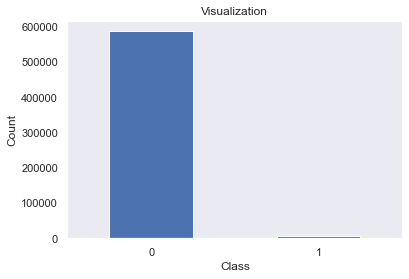

In [48]:
#Plot using matplotlib.pyplot

labels = ["LEGIT", "FRAUD"]
count_results = dataset['fraud'].value_counts()
count_results.plot(kind = "bar", rot = 0)
plt.title("Visualization")
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()

# Dividing dataset into two sets(Independent and Dependent

In [49]:
x = dataset.iloc[:,1:9].values

In [50]:
x

array([[2.100e+02, 4.000e+00, 0.000e+00, ..., 0.000e+00, 1.200e+01,
        4.550e+00],
       [2.753e+03, 2.000e+00, 0.000e+00, ..., 0.000e+00, 1.200e+01,
        3.968e+01],
       [2.285e+03, 4.000e+00, 1.000e+00, ..., 0.000e+00, 1.200e+01,
        2.689e+01],
       ...,
       [5.290e+02, 2.000e+00, 1.000e+00, ..., 0.000e+00, 2.000e+00,
        2.244e+01],
       [1.083e+03, 5.000e+00, 0.000e+00, ..., 0.000e+00, 1.200e+01,
        1.446e+01],
       [3.304e+03, 4.000e+00, 1.000e+00, ..., 0.000e+00, 1.200e+01,
        2.693e+01]])

In [51]:
y = dataset.iloc[:,9:10].values

In [52]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [53]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25)

# Decision Tree Classifier

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [87]:
# Accuracy on training data

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_train) 

accuracy = accuracy_score(pred, y_train)
print("Accuracy on training data :  %0.3f" % accuracy)

Accuracy on training data :  1.000


In [56]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred = dt.predict(x_test)
accuracy = metrics.accuracy_score(y_test, pred)
precision = metrics.precision_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)
f1 = (2 * precision * recall) / (precision + recall)
print("Accuracy :  %0.3f" % accuracy)
print(f"Classification Report :- \n {classification_report(y_test, pred)}")
c_matrix = metrics.confusion_matrix(y_test, pred)
print(f"Confusion Matrix :- \n {c_matrix}")

Accuracy :  0.994
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    146892
           1       0.75      0.75      0.75      1769

    accuracy                           0.99    148661
   macro avg       0.87      0.87      0.87    148661
weighted avg       0.99      0.99      0.99    148661

Confusion Matrix :- 
 [[146448    444]
 [   443   1326]]


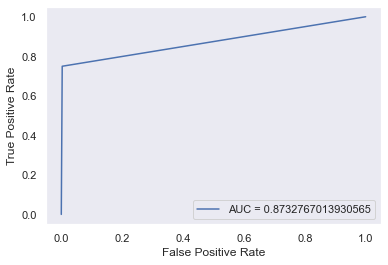

In [57]:
#Create ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr, tpr, label = "AUC = " + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)
plt.show()

In [58]:
c_matrix = metrics.confusion_matrix(y_test, pred)

In [59]:
c_matrix

array([[146448,    444],
       [   443,   1326]], dtype=int64)

In [60]:
x_train

array([[1.5470e+03, 2.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.2000e+01,
        2.6000e+01],
       [6.7200e+02, 2.0000e+00, 1.0000e+00, ..., 0.0000e+00, 1.2000e+01,
        1.8570e+01],
       [2.0220e+03, 2.0000e+00, 1.0000e+00, ..., 0.0000e+00, 8.0000e+00,
        1.8098e+02],
       ...,
       [8.2300e+02, 5.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.2000e+01,
        2.0960e+01],
       [2.8400e+02, 2.0000e+00, 1.0000e+00, ..., 0.0000e+00, 1.2000e+01,
        3.2590e+01],
       [2.9630e+03, 2.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.2000e+01,
        1.0400e+01]])

In [61]:
x_test[10]

array([3.667e+03, 3.000e+00, 0.000e+00, 0.000e+00, 1.800e+01, 0.000e+00,
       1.200e+01, 2.169e+01])

# K nearest Neighbor

In [62]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
pred = KNN.predict(x_test)

accuracy = metrics.accuracy_score(y_test, pred)
precision = metrics.precision_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)
f1 = (2 * precision * recall) / (precision + recall)
print("Accuracy :  %0.3f" % accuracy)
print(f"Classification Report :- \n {classification_report(y_test, pred)}")
c_matrix = metrics.confusion_matrix(y_test, pred)
print(f"Confusion Matrix :- \n {c_matrix}")

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy :  0.994
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    146892
           1       0.83      0.60      0.69      1769

    accuracy                           0.99    148661
   macro avg       0.91      0.80      0.85    148661
weighted avg       0.99      0.99      0.99    148661

Confusion Matrix :- 
 [[146668    224]
 [   708   1061]]


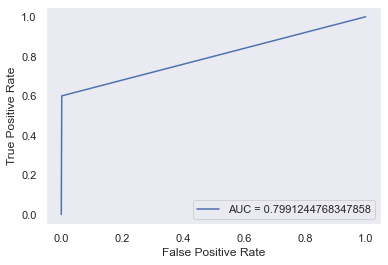

In [63]:
#Create ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr, tpr, label = "AUC = " + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)
plt.show()

# SVM

In [64]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)

accuracy = metrics.accuracy_score(y_test, pred)
print("Accuracy :  %0.3f" % accuracy)
print(f"Classification Report :- \n {classification_report(y_test, pred)}")
c_matrix = metrics.confusion_matrix(y_test, pred)
print(f"Confusion Matrix :- \n {c_matrix}")

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy :  0.993
Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    146892
           1       0.94      0.48      0.64      1769

    accuracy                           0.99    148661
   macro avg       0.97      0.74      0.82    148661
weighted avg       0.99      0.99      0.99    148661

Confusion Matrix :- 
 [[146842     50]
 [   922    847]]


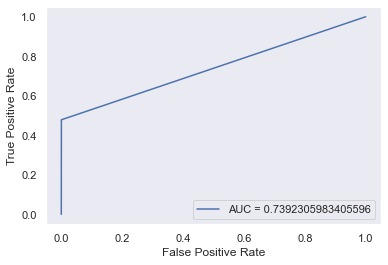

In [65]:
#Create ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr, tpr, label = "AUC = " + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)
plt.show()

# Naive Bayes Algorithm

In [66]:
from sklearn.naive_bayes import GaussianNB
GB = GaussianNB()
GB.fit(x_train, y_train)
pred = GB.predict(x_test)

accuracy = metrics.accuracy_score(y_test, pred)
print("Accuracy :  %0.3f" % accuracy)
print(f"Classification Report :- \n {classification_report(y_test, pred)}")
c_matrix = metrics.confusion_matrix(y_test, pred)
print(f"Confusion Matrix :- \n {c_matrix}")

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy :  0.985
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    146892
           1       0.42      0.78      0.55      1769

    accuracy                           0.98    148661
   macro avg       0.71      0.88      0.77    148661
weighted avg       0.99      0.98      0.99    148661

Confusion Matrix :- 
 [[145011   1881]
 [   388   1381]]


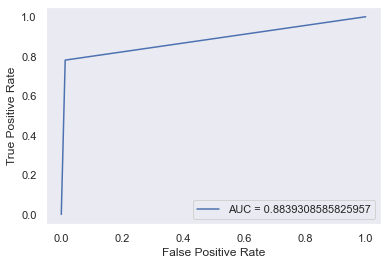

In [67]:
#Create ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr, tpr, label = "AUC = " + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)
plt.show()

In [68]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=1)

# Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
LR = LogisticRegression()

In [71]:
LR.fit(x_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
pred = LR.predict(x_test)

In [73]:
accuracy = metrics.accuracy_score(y_test, pred)
print("Accuracy :  %0.3f" % accuracy)
print(f"Classification Report :- \n {classification_report(y_test, pred)}")
c_matrix = metrics.confusion_matrix(y_test, pred)
print(f"Confusion Matrix :- \n {c_matrix}")

Accuracy :  0.993
Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    176167
           1       0.87      0.54      0.67      2226

    accuracy                           0.99    178393
   macro avg       0.93      0.77      0.83    178393
weighted avg       0.99      0.99      0.99    178393

Confusion Matrix :- 
 [[175981    186]
 [  1024   1202]]


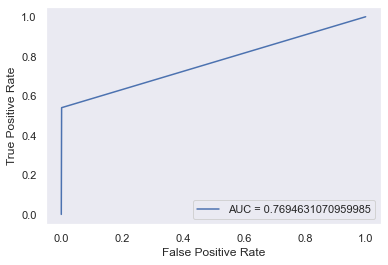

In [74]:
#Create ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr, tpr, label = "AUC = " + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)
plt.show()

In [75]:
legit

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,210,4.0,0.0,0,30,0,12,4.55,0
1,0,2753,2.0,0.0,0,30,0,12,39.68,0
2,0,2285,4.0,1.0,0,18,0,12,26.89,0
3,0,1650,3.0,0.0,0,30,0,12,17.25,0
4,0,3585,5.0,0.0,0,30,0,12,35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,1639,3.0,1.0,0,18,0,12,20.53,0
594639,179,3369,4.0,1.0,0,18,0,12,50.73,0
594640,179,529,2.0,1.0,0,31,0,2,22.44,0
594641,179,1083,5.0,0.0,0,18,0,12,14.46,0


In [76]:
fraud

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
88,0,3219,3.0,0.0,0,34,0,4,44.26,1
89,0,723,3.0,0.0,0,34,0,4,324.50,1
434,0,362,3.0,0.0,0,44,0,6,176.32,1
435,0,4040,3.0,0.0,0,44,0,6,337.41,1
553,0,969,4.0,1.0,0,2,0,14,220.11,1
...,...,...,...,...,...,...,...,...,...,...
593928,179,2456,5.0,0.0,0,32,0,8,192.78,1
594025,179,3357,5.0,1.0,0,16,0,14,42.37,1
594026,179,2522,3.0,1.0,0,16,0,14,521.84,1
594168,179,544,2.0,1.0,0,27,0,14,25.29,1


In [77]:
x_legit = legit.iloc[:,1:9].values

In [78]:
y_legit = legit.iloc[:,9:10].values

# Dividing into training and testing set

In [79]:
from sklearn.model_selection import train_test_split  
x_train_legit, x_test_legit, y_train_legit, y_test_legit = train_test_split(x_legit, y_legit, test_size= 0.40)

# Decision Tree Algorithm

In [80]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [81]:
dt = DecisionTreeClassifier()
dt.fit(x_train_legit, y_train_legit)
pred = dt.predict(x_test_legit)
accuracy = metrics.accuracy_score(y_test_legit, pred)
precision = metrics.precision_score(y_test_legit, pred)
recall = metrics.recall_score(y_test_legit, pred)
f1 = (2 * precision * recall) / (precision + recall)
print("Accuracy :  %0.3f" % accuracy)
print(f"Classification Report :- \n {classification_report(y_test_legit, pred)}")
c_matrix = metrics.confusion_matrix(y_test_legit, pred)
print(f"Confusion Matrix :- \n {c_matrix}")

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Temp/ipykernel_14356/389631903.py:7: RuntimeWarning: invalid value encountered in double_scalars
  f1 = (2 * precision * recall) / (precision + recall)


Accuracy :  1.000
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    234978

    accuracy                           1.00    234978
   macro avg       1.00      1.00      1.00    234978
weighted avg       1.00      1.00      1.00    234978

Confusion Matrix :- 
 [[234978]]


# Fraud Data testing & validation

In [82]:
x_fraud = fraud.iloc[:,1:9].values
y_fraud = fraud.iloc[:,9:10].values

In [83]:
from sklearn.model_selection import train_test_split  
x_train_fraud, x_test_fraud, y_train_fraud, y_test_fraud = train_test_split(x_fraud, y_fraud, test_size= 0.40)

In [84]:
dt.fit(x_train_fraud, y_train_fraud)
pred = dt.predict(x_test_fraud)
accuracy = metrics.accuracy_score(y_test_fraud, pred)
precision = metrics.precision_score(y_test_fraud, pred)
recall = metrics.recall_score(y_test_fraud, pred)
f1 = (2 * precision * recall) / (precision + recall)
print("Accuracy :  %0.3f" % accuracy)
print(f"Classification Report :- \n {classification_report(y_test_fraud, pred)}")
c_matrix = metrics.confusion_matrix(y_test_fraud, pred)
print(f"Confusion Matrix :- \n {c_matrix}")

Accuracy :  1.000
Classification Report :- 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2880

    accuracy                           1.00      2880
   macro avg       1.00      1.00      1.00      2880
weighted avg       1.00      1.00      1.00      2880

Confusion Matrix :- 
 [[2880]]
